In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    ! pip install seaborn
    import seaborn as sns

#### Functions

In [2]:
class AnalyzeScheduleResults:
    # initialize
    def __init__(self, df):
        self.df = df
    # plot distributions
    def plot_distributions(self):
        # copy
        df = self.df.copy()

        # get home win pct
        flt_home_win_pct = df['home_win'].mean()
    
        # make lists
        list_pts_home = list(df['home_pts'])
        list_pts_away = list(df['away_pts'])
        
        # home
        flt_mean_home = np.mean(list_pts_home)
        flt_sd_home = np.std(list_pts_home)
        str_label_home = f'Home (Mn = {flt_mean_home:0.2f} +/- SD = {flt_sd_home:0.2f})'
        
        # away
        flt_mean_away = np.mean(list_pts_away)
        flt_sd_away = np.std(list_pts_away)
        str_label_away = f'Away (Mn = {flt_mean_away:0.2f} +/- SD = {flt_sd_away:0.2f})'
        
        # title
        str_title = f"Distribution of Points Scored (Home vs. Away) - Home Win Pct {flt_home_win_pct:0.4f})"
        
        # ax
        fig, ax = plt.subplots(figsize=(9, 5))
        # title
        ax.set_title(str_title)
        # x-label
        ax.set_xlabel('Points')
        # home
        sns.kdeplot(list_pts_home, ax=ax, label=str_label_home)
        # away
        sns.kdeplot(list_pts_away, ax=ax, label=str_label_away)
        # legend
        ax.legend()
        
        # save
        str_filename = 'plt_distribution.png'
        str_local_path = f'{str_dirname_output}/{str_filename}'
        plt.savefig(
            str_local_path,
            bbox_inches='tight',
        )
        
        # show
        plt.show()

#### Constants

In [3]:
str_dirname_output = './output'

#### Output

In [4]:
try:
    os.mkdir(str_dirname_output)
except FileExistsError:
    pass

#### Import data

In [5]:
str_filename = 'df.csv'
str_local_path = f'../01_scrape_schedule_results/output/{str_filename}'
df = pd.read_csv(str_local_path)
# show
df

,game,date,home_team,home_pts,away_team,away_pts,home_win,away_win
0,1,"Tue, Oct 21, 2025",Oklahoma City Thunder,125,Houston Rockets,124,1,0
1,2,"Tue, Oct 21, 2025",Los Angeles Lakers,109,Golden State Warriors,119,0,1
2,3,"Wed, Oct 22, 2025",Charlotte Hornets,136,Brooklyn Nets,117,1,0
3,4,"Wed, Oct 22, 2025",New York Knicks,119,Cleveland Cavaliers,111,1,0
4,5,"Wed, Oct 22, 2025",Orlando Magic,125,Miami Heat,121,1,0
...,...,...,...,...,...,...,...,...
725,726,"Sat, Jan 31, 2026",Indiana Pacers,129,Atlanta Hawks,124,1,0
726,727,"Sat, Jan 31, 2026",Philadelphia 76ers,124,New Orleans Pelicans,114,1,0
727,728,"Sat, Jan 31, 2026",Memphis Grizzlies,114,Minnesota Timberwolves,131,0,1
728,729,"Sat, Jan 31, 2026",Miami Heat,118,Chicago Bulls,125,0,1


#### Initialize class

In [6]:
cls_analyze = AnalyzeScheduleResults(
    df=df,
)

#### Plot home vs away points

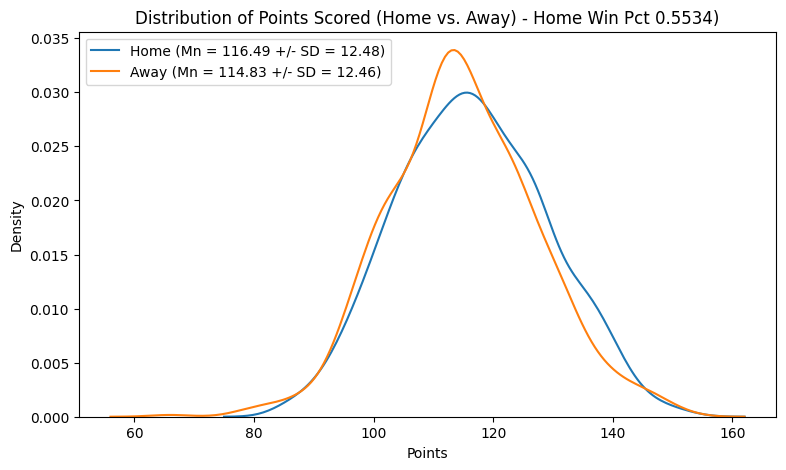

In [7]:
cls_analyze.plot_distributions()